# Data Pre-Processing for Predicting Myers Briggs Types
### By Arnav Bhakta$^{1}$ and William Yue$^{1}$
#### $^{1}$ Phillips Academy Andover

##### The author(s) would like to thank Patrick Chen, Michael Huang, and Ali Cy for their helpful input and advice in crafting this notebook.

In this notebook, we will be going through the data pre-processing steps that are necessary in order predict Myers Briggs Type Indicators (MBTI). To give a bit of an overview, MBTI is an "introspective self-report questionnaire indicating differing psychological preferences in how people perceive the world and make decisions" [[1]](https://en.wikipedia.org/wiki/Myers%E2%80%93Briggs_Type_Indicator). It "divides everyone into $2^4=16$ distinct personality types across $4$ axes:

* Introversion (I) – Extroversion (E)
* Intuition (N) – Sensing (S)
* Thinking (T) – Feeling (F)
* Judging (J) – Perceiving (P)"

and assigns everyone a label, based on which of the personality types they fulfill [[2]](https://www.kaggle.com/datasnaek/mbti-type). "For example, someone who prefers introversion, intuition, thinking and perceiving would be labelled an INTP in the MBTI system" [[2]](https://www.kaggle.com/datasnaek/mbti-type). In doing so, it is possible to get more of an overview of someone's personality, their preferences, and behaviors, and psychological perspective. Hence, in the current study, we look to levarage machine learning (ML) to correctly and accurately classify people's personalities or MBTIs, based on how it is that they "speak" and interact with others. The data is taken from the Kaggle [(MBTI) Myers-Briggs Personality Type Dataset](https://www.kaggle.com/datasnaek/mbti-type), which provides text of people interacting in a forum, as we presume from reading over samples in the dataset, which are then labeled with their corresponding personality type [[2]](https://www.kaggle.com/datasnaek/mbti-type).

In the current notebook, we have seperated the presented dataset into a smaller set, consistent of two types of labeled data, Introversion (I) and Extroversion (E). Using the provided texts for each of these labels (Introversion being labeled a 1 and Extroversion being labeled a 0), we hope to be able to accurately predict each of these personality types.

In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


### Importing Libraries

We import the below libraries to help us with data pre-processing. Pandas (`pandas`) is primarily used for loading in the data from a csv, and creating DataFrames. NumPy (`numpy`) is primarily used for creating arrays and simple arithmetic. Regular expression operations (`re`) are primarily used for splitting up the samples and removing unwanted or implicative text from the dataset. Tokenize and Tokenizer are primarily used to split up sentences into smaller units or words called tokens, to helping to understand the text and build the model, by making it easier to understand the meaning of the text, by analyzing it as a sequence of words. The remaining libraries are used for importing and exporting data.

In [2]:
# Standard Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from bs4 import BeautifulSoup
import requests
import json

plt.style.use('fivethirtyeight')

### Loading in the Data

Below, we load the data using Pandas from a directory called `datasets` which shares a parent directory with the directory this Jupyter notebook is in. Then, we split up the columns of the dataset into two distinct features: the text and labels. We then cast them to NumPy array from Pandas DataFrames, for ease of use later on.

In [3]:
read_path_0 = os.path.join('..','datasets','0.csv')
df = pd.read_csv(read_path_0)
df_text = np.array(df['text'])
df_label = np.array(df['label'])

display(df_text)

array(["'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.

We then create two lists: `df_user` and `personality_types`. `df_user` will hold all of the text in the dataset, after sensitive or hard to understand strings are removed. `personality_types` contains all of the 16 possible personality types one can have, as in the sample text, there are multiple instances of these personality types. So, we go ahead and remove them, as to optimize the training of our model, and ensure that it fully bases its predictions off of more natural language, as the different personality types are not necessarily elements of everday speech

In [4]:
df_user = []
personality_types = ['intj', 'intp', 'entp', 'entj', 'infj', 'infp', 'enfj', 'enfp', 'istj', 'isfj', 'estj', 'esfj', 'istp', 'isfp', 'estp', 'esfp']

In addition to removing all mentions of the different personality types, we also replace all instances of links in the text using the `re.sub()` method, as once again, links do not arise in everyday speech. After removing all such instances of sensitive or hard to understand text from the samples, we for one fix any spacing issues that may have arisen during the removing of these specific types of texts, but also, split the text up into the text of the different users, by splitting the text at all instances of `'|||'`, which serve to indicate a break in the person who is saying the speech. In doing so, we are able to have an individual person's speech matched with their specific label or personality type.

In [5]:
for i in df_text:
    # Remove all links, special characters, and substrings of actual personality types
    text = i.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'https\S+', '', text)
    text = re.sub(r'@[A-Za-z0-9]+','', text)
    for j in personality_types:
        text = re.sub(j, '', text)
    while True:
        before_text = text
        text=text.replace('  ', ' ')
        if before_text == text:
            break
    df_user.append(np.array(text.split('|||'))) # Divide a user's posts

Displaying the split text:

In [6]:
df_user = np.array(df_user, dtype=object)
display(df_user)

array([array(["' and moments sportscenter not top ten plays pranks",
       'what has been the most life-changing experience in your life?',
       ' on repeat for most of today.',
       'may the perc experience immerse you.',
       "the last thing my friend posted on his facebook before committing suicide the next day. rest in peace~ 7. sorry to hear of your distress. it's only natural for a relationship to not be perfection all the time in every moment of existence. try to figure the hard times as times of growth, as...",
       '84389 84390 ...', 'welcome and stuff.', ' game. set. match.',
       "prozac, wellbrutin, at least thirty minutes of moving your legs (and i don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...",
       "basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types' cognitive functions and what

### Tokenization

As mentioned above, we tokenize the text, by splitting it up into smaller units, as to optimize our model's ability to analyze the text and discover patterns within it. However, prior to doing so, we first go ahead and flatten the array, by reducing its dimensionality to a 1-dimensional array, in order to be able to tokenize the text, as currently, our text is within a series of nested arrays. We do this, be defining a new list, `df_user_flattened`, and looping through each nested array in the `df_user` array, which currently holds all the texts, and assigning each string of text within these nested arrays as new elements in our new 1-dimensional `df_user_flattened` list. We also create a list `df_label_flattened`, which stores the labels in the right order.

In [7]:
df_user_flattened = []
df_label_flattened = []

In [8]:
for index, i in enumerate(df_user):
    for j in i:
        df_user_flattened.append(j)
        df_label_flattened.append(df_label[index])

We then convert `df_user_flattened` and `df_label_flattened` into NumPy arrays for ease of use, and display its values. As we can see below, we have successfully reduced the dimensionality of our array while preserving the labels.

In [9]:
df_user_flattened = np.array(df_user_flattened)
display(df_user_flattened)
display(df_label_flattened)

array(["' and moments sportscenter not top ten plays pranks",
       'what has been the most life-changing experience in your life?',
       ' on repeat for most of today.', ...,
       'i have seen it, and i agree. i did actually think that the first time i watched the movie, and from the beginning (or when they got their powers) i kinda thought andrew would never work right with...',
       "ok so i have just watched underworld 4 (awakening) and must say it was a really good film, compared to the other films out in the last few months anyway. i don't think it was as good as the first 3...",
       "i would never want to turn off my emotions. sometimes i hide them from the world, but i still need them for me.'"],
      dtype='<U874')

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


Next we go ahead and tokenize our data. In the current study, we do so using `Tokenizer` from `keras`. `Tokenizer` takes in a few parameters, when tokenizing the data, which are as follows: num_words returns the ids of the `n` most commonly used words in the dataset, where `n` is the `vocab_size` we defined as `vocab_size = 4000`, `oov_token` is used to replace out of vocabulary words.

In [10]:
vocab_size = 4000 

oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size
                      ,oov_token= oov_tok)
tokenizer.fit_on_texts(df_user_flattened)
word_index = tokenizer.word_index

Post-tokenization, we are able to call `word_index` from `tokenizer`, to get the most commonly used words in our dataset, which are:

In [11]:
word_index

{'<OOV>': 1,
 'i': 2,
 'the': 3,
 'to': 4,
 'a': 5,
 'and': 6,
 'of': 7,
 'you': 8,
 'that': 9,
 'it': 10,
 'is': 11,
 'in': 12,
 'my': 13,
 'but': 14,
 'for': 15,
 'have': 16,
 'with': 17,
 'me': 18,
 'this': 19,
 "i'm": 20,
 'be': 21,
 'not': 22,
 'are': 23,
 'like': 24,
 'on': 25,
 'an': 26,
 'as': 27,
 'so': 28,
 'was': 29,
 'just': 30,
 'if': 31,
 'or': 32,
 'do': 33,
 'what': 34,
 'about': 35,
 "don't": 36,
 'think': 37,
 'people': 38,
 'your': 39,
 'when': 40,
 "it's": 41,
 'at': 42,
 'can': 43,
 'all': 44,
 'know': 45,
 'one': 46,
 'they': 47,
 'more': 48,
 'really': 49,
 'would': 50,
 'we': 51,
 'how': 52,
 'out': 53,
 'because': 54,
 'get': 55,
 'from': 56,
 'am': 57,
 "i've": 58,
 'some': 59,
 'time': 60,
 'he': 61,
 'up': 62,
 'very': 63,
 'there': 64,
 'no': 65,
 'them': 66,
 's': 67,
 'who': 68,
 'feel': 69,
 'much': 70,
 'well': 71,
 'being': 72,
 'too': 73,
 'been': 74,
 'by': 75,
 'love': 76,
 'good': 77,
 'things': 78,
 'other': 79,
 'say': 80,
 'way': 81,
 'something

We can also check the lengths of all the texts in this dataset.

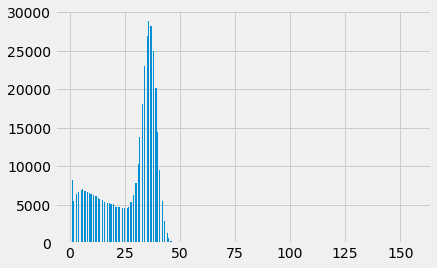

In [12]:
lens = []
for i in df_user_flattened:
    sample_lens = i.split(" ")
    lens.append(len(sample_lens))

plt.hist(lens, bins='auto')
plt.show()

### Texts to Sequences

In order to be able to train our model using the available texts, we then use the `texts_to_sequences` method to convert our text to a sequence of integers. This is done by using the most frequent words that we found above, and replacing these words that the tokenizer knows, with integers, such that the model that we will build is able to interpret the text.

In [13]:
tokenized = tokenizer.texts_to_sequences(df_user_flattened)

In [14]:
tokenized

[[172, 6, 1320, 1, 22, 690, 1862, 2111, 1],
 [34, 91, 74, 3, 86, 107, 1458, 293, 12, 39, 107],
 [25, 2217, 15, 86, 7, 369],
 [199, 3, 725, 293, 1, 8],
 [3,
  240,
  115,
  13,
  147,
  572,
  25,
  134,
  1032,
  187,
  1,
  2147,
  3,
  465,
  184,
  773,
  12,
  1325,
  531,
  275,
  4,
  413,
  7,
  39,
  1,
  41,
  88,
  823,
  15,
  5,
  237,
  4,
  22,
  21,
  3942,
  44,
  3,
  60,
  12,
  218,
  476,
  7,
  1514,
  153,
  4,
  522,
  3,
  201,
  243,
  27,
  243,
  7,
  2437,
  27],
 [1, 1],
 [297, 6, 280],
 [488, 702, 1228],
 [1,
  1,
  42,
  260,
  1,
  995,
  7,
  1084,
  39,
  3311,
  6,
  2,
  36,
  159,
  1084,
  66,
  171,
  1110,
  12,
  39,
  130,
  2811,
  3888,
  1981,
  12,
  1,
  149,
  153,
  1,
  27,
  5,
  1,
  2218],
 [515,
  215,
  62,
  17,
  552,
  3482,
  446,
  2793,
  9,
  318,
  92,
  32,
  1,
  221,
  8,
  83,
  4,
  33,
  50,
  48,
  93,
  405,
  224,
  629,
  318,
  1,
  633,
  346,
  6,
  1,
  40,
  501,
  75],
 [44,
  78,
  12,
  1,
  1,
  11,
  102

### Padding

The final step that we take, is padding each of the samples, to be the same length. As seen above, the max number of words in the samples of texts that we are provided with is 156 words, so we pad all of the sequences to a length of 150, to ensure that all of the sequences have the same length. This is done using the `pad_sequences` method, which takes the tokenized and sequenced text that we just defined, and pads all of the sequences or truncates them to a length of 150, by adding on 0s until the sequence has a length of 150, or removing integers from the sequence, until the sequence has a length of 150.

In [15]:
padded = pad_sequences(tokenized, maxlen=150, padding='post', truncating='post')

As seen below, our padding was successful, and leaves us with an array of 405263 sequences of length 150, to pass into our model, so that we can predict MBTIs.

In [16]:
padded

array([[ 172,    6, 1320, ...,    0,    0,    0],
       [  34,   91,   74, ...,    0,    0,    0],
       [  25, 2217,   15, ...,    0,    0,    0],
       ...,
       [   2,   16,  364, ...,    0,    0,    0],
       [ 411,   28,    2, ...,    0,    0,    0],
       [   2,   50,  106, ...,    0,    0,    0]])

In [17]:
padded.shape

(405263, 150)

In [29]:
df_label_flattened_2d = np.array([df_label_flattened]).T

In [33]:
write_path = os.path.join('..','datasets','processed0.csv')

pd.DataFrame(np.concatenate([padded,df_label_flattened_2d], axis=1)).to_csv(write_path)